Notebook exploring the non-SFMS component of the best-fit GMMs

In [7]:
import numpy as np 
import corner as DFM
from scipy.stats import multivariate_normal as MNorm

import env
import catalogs as Cats
from fstarforms import fstarforms

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

In [10]:
Cat = Cats.Catalog()
_logM, _logSFR, w, censat = Cat.Read('eagle_inst')
iscen = (censat == 1)
logM = _logM[iscen]
logSFR = _logSFR[iscen]

/Users/chang/projects/LetsTalkAboutQuench/letstalkaboutquench/catalogs.py:89: RuntimeWarning: divide by zero encountered in log10
  logSFR = np.log10(_SFR) # log SFRs

------ eagle_inst ------
10295 of 29810 galaxies have 0/non-finite SFRs
logSFR of these galaxies will be -999.


In [11]:
fSFMS = fstarforms()
fit_logm, fit_logsfr = fSFMS.fit(logM, logSFR, method='gaussmix', forTest=True)

2663 galaxies have nonsensical logM* or logSFR values


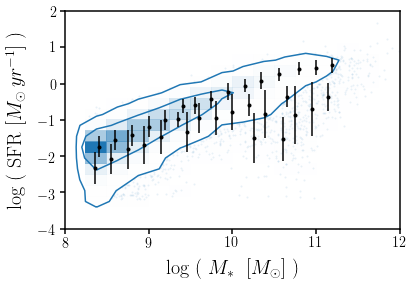

In [41]:
fig = plt.figure()
sub = fig.add_subplot(111)
DFM.hist2d(logM, logSFR, color='k', levels=[0.68, 0.95], range=[[7., 12.], [-4., 2.]], alpha=0.5, ax=sub)

sfms_err = []
for i_m in range(len(fit_logm)): 
    

sub.errorbar(fit_logm, fit_logsfr)

for i_m, fitlogm in enumerate(fit_logm): 
    sub.errorbar([fitlogm+0.05*float(i) for i in range(len(fSFMS._gmix_means[i_m]))], fSFMS._gmix_means[i_m]+fitlogm, 
                yerr=np.sqrt(fSFMS._gmix_covariances[i_m]), fmt='.k')#marker='x')
#sub.scatter(fit_logm, fit_logsfr, marker='x', color='k')
sub.set_xlim([8., 12.])
sub.set_xlabel(r'log ( $M_* \;\;[M_\odot]$ )', labelpad=10, fontsize=20)
sub.set_ylim([-4., 2.])
sub.set_ylabel(r'log ( SFR $[M_\odot \, yr^{-1}]$ )', labelpad=10, fontsize=20)
plt.show()

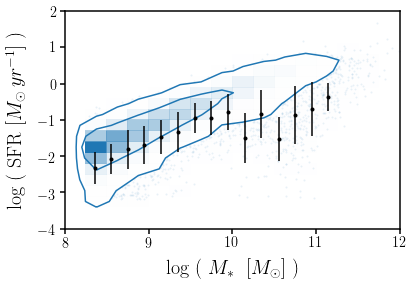

In [35]:
fig = plt.figure()
sub = fig.add_subplot(111)
DFM.hist2d(logM, logSFR, color='C0', levels=[0.68, 0.95], range=[[7., 12.], [-4., 2.]], alpha=0.5, ax=sub)
for i_m, fitlogm in enumerate(fit_logm): 
    sub.errorbar([fitlogm], fSFMS._gmix_means[i_m].min()+fitlogm, 
                 yerr=np.sqrt(fSFMS._gmix_covariances[i_m][np.argmin(fSFMS._gmix_means[i_m])]),
                 fmt='.k')#, color='k')
sub.set_xlim([8., 12.])
sub.set_xlabel(r'log ( $M_* \;\;[M_\odot]$ )', labelpad=10, fontsize=20)
sub.set_ylim([-4., 2.])
sub.set_ylabel(r'log ( SFR $[M_\odot \, yr^{-1}]$ )', labelpad=10, fontsize=20)
plt.show()


------ illustris_inst ------
7000 of 66808 galaxies have 0/non-finite SFRs
logSFR of these galaxies will be -999.
1102 galaxies have nonsensical logM* or logSFR values
SFMS is not well defined in the M* bin11.1525-11.3525
SFMS is not well defined in the M* bin11.3525-11.5525


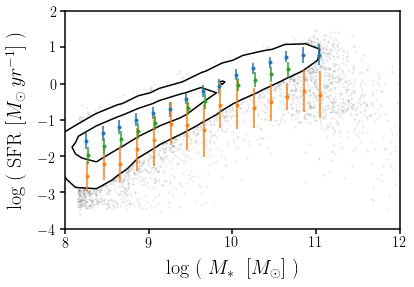


------ illustris_100myr ------
16943 of 66808 galaxies have 0/non-finite SFRs
logSFR of these galaxies will be -999.
7678 galaxies have nonsensical logM* or logSFR values
SFMS is not well defined in the M* bin11.1525-11.3525
SFMS is not well defined in the M* bin11.3525-11.5525


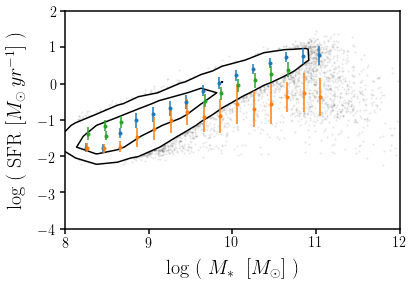


------ eagle_inst ------
10295 of 29810 galaxies have 0/non-finite SFRs
logSFR of these galaxies will be -999.
2663 galaxies have nonsensical logM* or logSFR values


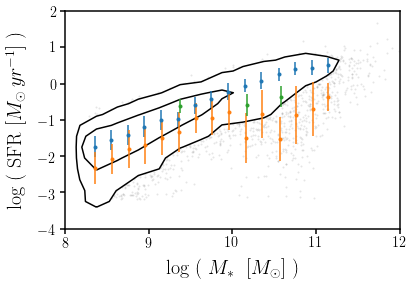


------ eagle_100myr ------
14743 of 29810 galaxies have 0/non-finite SFRs
logSFR of these galaxies will be -999.
5942 galaxies have nonsensical logM* or logSFR values


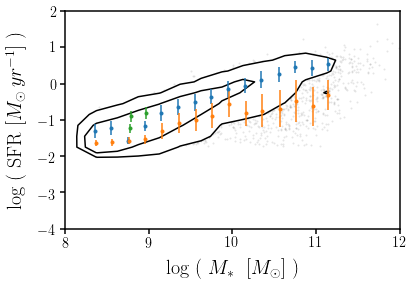


------ mufasa_inst ------
3636 of 7973 galaxies have 0/non-finite SFRs
logSFR of these galaxies will be -999.
909 galaxies have nonsensical logM* or logSFR values


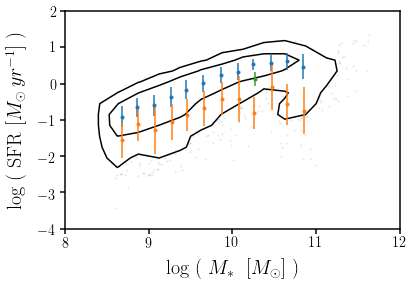


------ mufasa_100myr ------
4811 of 7973 galaxies have 0/non-finite SFRs
logSFR of these galaxies will be -999.
1777 galaxies have nonsensical logM* or logSFR values


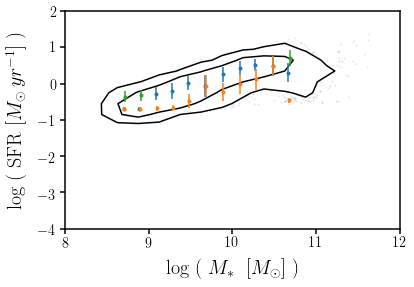

/Users/chang/projects/LetsTalkAboutQuench/letstalkaboutquench/catalogs.py:125: RuntimeWarning: divide by zero encountered in log10
  logM = np.log10(_M) + 9.
/Users/chang/projects/LetsTalkAboutQuench/letstalkaboutquench/catalogs.py:126: RuntimeWarning: divide by zero encountered in log10
  logSFR = np.log10(_SFR)

------ scsam_inst ------
30482 of 66090 galaxies have 0/non-finite SFRs
logSFR of these galaxies will be -999.
1146 galaxies have nonsensical logM* or logSFR values


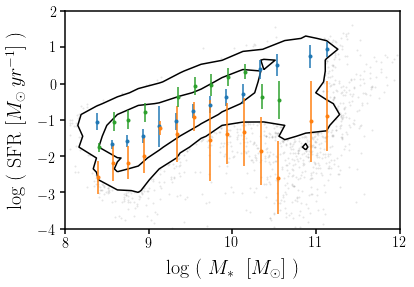


------ scsam_100myr ------
30108 of 66090 galaxies have 0/non-finite SFRs
logSFR of these galaxies will be -999.
1087 galaxies have nonsensical logM* or logSFR values


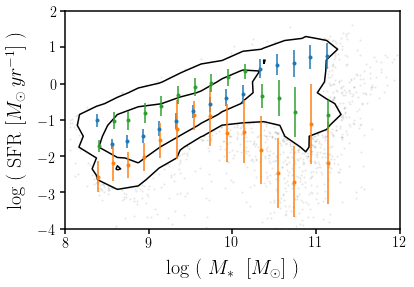

In [61]:
for sim in ['illustris', 'eagle', 'mufasa', 'scsam']:
    for tscale in ['inst', '100myr']:
        Cat = Cats.Catalog()
        _logM, _logSFR, w, censat = Cat.Read(sim+'_'+tscale)
        iscen = (censat == 1)
        logM = _logM[iscen]
        logSFR = _logSFR[iscen]

        fSFMS = fstarforms()
        fit_logm, fit_logsfr = fSFMS.fit(logM, logSFR, method='gaussmix', forTest=True)

        fig = plt.figure()
        sub = fig.add_subplot(111)
        DFM.hist2d(logM, logSFR, color='k', levels=[0.68, 0.95], range=[[7., 12.], [-4., 2.]], plot_density=False, ax=sub)

        sfms_err = []
        for i_m in range(len(fit_logm)): 
            sfms_err.append(np.sqrt(fSFMS._gmix_covariances[i_m][fSFMS._gmix_means[i_m] == fit_logsfr[i_m]-fit_logm[i_m]]))
        sub.errorbar(fit_logm, fit_logsfr, yerr=sfms_err, fmt='.C0')

        for i_m, fitlogm in enumerate(fit_logm): 
            quenched = fSFMS._gmix_means[i_m].argmin()
            transit = (fSFMS._gmix_means[i_m] != fit_logsfr[i_m]-fit_logm[i_m]) & (fSFMS._gmix_means[i_m] != fSFMS._gmix_means[i_m].min())
            sub.errorbar([fitlogm+0.01], fSFMS._gmix_means[i_m][quenched]+fitlogm, 
                         yerr=np.sqrt(fSFMS._gmix_covariances[i_m][quenched]), 
                         fmt='.C1')#marker='x')
            if np.sum(transit) > 0: 
                sub.errorbar([fitlogm + 0.01*(i+2) for i in range(np.sum(transit))], 
                             fSFMS._gmix_means[i_m][transit]+fitlogm, 
                             yerr=np.sqrt(fSFMS._gmix_covariances[i_m][transit]), 
                             fmt='.C2')
        #sub.scatter(fit_logm, fit_logsfr, marker='x', color='k')
        sub.set_xlim([8., 12.])
        sub.set_xlabel(r'log ( $M_* \;\;[M_\odot]$ )', labelpad=10, fontsize=20)
        sub.set_ylim([-4., 2.])
        sub.set_ylabel(r'log ( SFR $[M_\odot \, yr^{-1}]$ )', labelpad=10, fontsize=20)
        plt.show()